This notebook contains a few crosschecks to test how well our frequentist analysis is calibrated.
You feed in a list of deltachi2s and can compare different distributions. I used this to determine whether 1000 pseudoexperiments was enough. And it was for a 90% sensitivity.

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
from matplotlib import cm
from root_pandas import read_root
import scipy.stats
from matplotlib import gridspec
import matplotlib.lines as mlines
import ROOT
import scipy.stats
from matplotlib import gridspec
import matplotlib.lines as mlines
from scipy.stats import chi2
import pandas as pd

plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

def getArrays(tree):

    chi2_c = np.zeros(tree.GetEntries())
    dm2_c = np.zeros(tree.GetEntries())
    sin22th_c = np.zeros(tree.GetEntries())
    
    for j in range(tree.GetEntries()):
        tree.GetEntry(j)
        
        chi2_c[j] = tree.chi2
        dm2_c[j] = tree.dm2
        sin22th_c[j] = tree.sin22th
        
    chi2 = chi2_c[chi2_c>0]
    dm2 = dm2_c[chi2_c>0]
    sin22th = sin22th_c[chi2_c>0]
    return chi2, dm2, sin22th

Welcome to JupyROOT 6.18/04


In [2]:
f_freqXcheck_null_2525_1k_lo = np.genfromtxt('xcheck/freqxcheck_null_2525_1k_lobound')
f_freqXcheck_null_2525_1k = np.genfromtxt('xcheck/freqxcheck_null_2525_1k')
f_freqXcheck_null_2525_10k = np.genfromtxt('xcheck/freqxcheck_null_2525_10k')
f_freqXcheck_null_5050_1k = np.genfromtxt('xcheck/freqxcheck_null_5050_1k')

In [3]:
chisqpt_2525_1k_lo  = f_freqXcheck_null_2525_1k_lo[:,1]
chisqbf_2525_1k_lo = f_freqXcheck_null_2525_1k_lo[:,2]
deltachisq_2525_1k_lo = chisqpt_2525_1k_lo-chisqbf_2525_1k_lo

chisqpt_2525_1k  = f_freqXcheck_null_2525_1k[:,1]
chisqbf_2525_1k = f_freqXcheck_null_2525_1k[:,2]
deltachisq_2525_1k = chisqpt_2525_1k-chisqbf_2525_1k

chisqpt_2525_10k  = f_freqXcheck_null_2525_10k[:,1]
chisqbf_2525_10k = f_freqXcheck_null_2525_10k[:,2]
deltachisq_2525_10k = chisqpt_2525_10k-chisqbf_2525_10k

chisqpt_5050_1k  = f_freqXcheck_null_5050_1k[:,1]
chisqbf_5050_1k = f_freqXcheck_null_5050_1k[:,2]
deltachisq_5050_1k = chisqpt_5050_1k-chisqbf_5050_1k

1.4489678740326368
1.238395562549627
1.3873423784023173
1.3033713013048405


Text(0.5, 1.0, '@ Null')

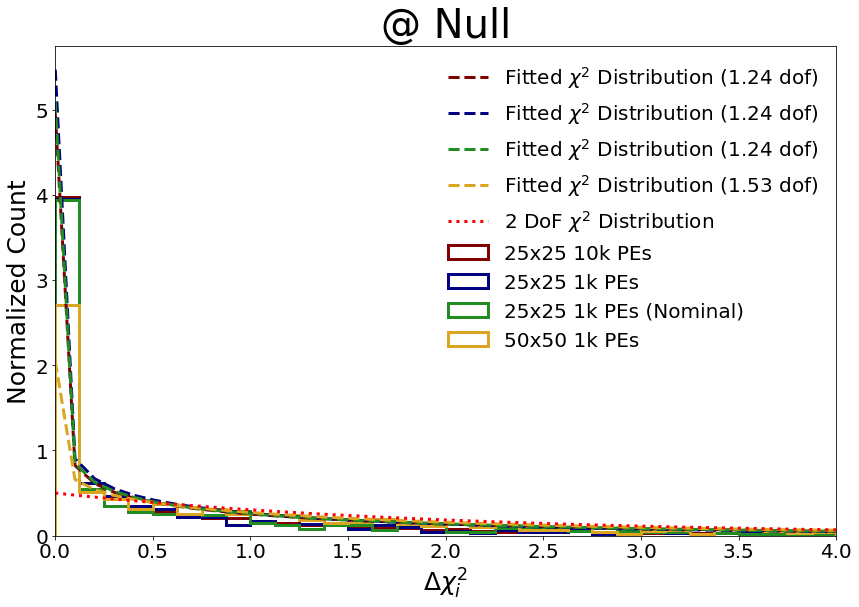

In [4]:
fig,ax = plt.subplots(figsize=(14,9))
_ = plt.hist(deltachisq_2525_10k,histtype='step',range=(0,10),bins=80,facecolor=None,linewidth=3,edgecolor='maroon',density=1,label='25x25 10k PEs')
_ = plt.hist(deltachisq_2525_1k,histtype='step',range=(0,10),bins=80,facecolor=None,linewidth=3,edgecolor='navy',density=1,label='25x25 1k PEs')
_ = plt.hist(deltachisq_2525_1k_lo,histtype='step',range=(0,10),bins=80,facecolor=None,linewidth=3,edgecolor='forestgreen',density=1,label='25x25 1k PEs (Nominal)')
_ = plt.hist(deltachisq_5050_1k,histtype='step',range=(0,10),bins=80,facecolor=None,linewidth=3,edgecolor='goldenrod',density=1,label='50x50 1k PEs')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


ax.set_xlim(0,4)
# #ax.set_ylim(0,1)
x = np.linspace(.001,10,100)

ax.set_xlabel(r'$\Delta\chi^2_i$',fontsize=25)
ax.set_ylabel('Normalized Count',fontsize=25)


df,loc,scale = scipy.stats.distributions.chi2.fit(deltachisq_2525_10k)
fitted_data = scipy.stats.distributions.chi2.pdf(x,df,loc,scale)
plt.plot(x,fitted_data,'--',label=r'Fitted $\chi^2$ Distribution (%.2f dof)'%df,linewidth=3,color='maroon')
print(scale)

df,loc,scale = scipy.stats.distributions.chi2.fit(deltachisq_2525_1k)
fitted_data = scipy.stats.distributions.chi2.pdf(x,df,loc,scale)
plt.plot(x,fitted_data,'--',label=r'Fitted $\chi^2$ Distribution (%.2f dof)'%df,linewidth=3,color='navy')
print(scale)

df,loc,scale = scipy.stats.distributions.chi2.fit(deltachisq_2525_1k_lo)
fitted_data = scipy.stats.distributions.chi2.pdf(x,df,loc,scale)
plt.plot(x,fitted_data,'--',label=r'Fitted $\chi^2$ Distribution (%.2f dof)'%df,linewidth=3,color='forestgreen')
print(scale)

df,loc,scale = scipy.stats.distributions.chi2.fit(deltachisq_5050_1k)
fitted_data = scipy.stats.distributions.chi2.pdf(x,df,loc,scale)
plt.plot(x,fitted_data,'--',label=r'Fitted $\chi^2$ Distribution (%.2f dof)'%df,linewidth=3,color='goldenrod')

print(scale)

twodof_data = scipy.stats.distributions.chi2.pdf(x,2,0,1)
plt.plot(x,twodof_data,'r:',label=r'2 DoF $\chi^2$ Distribution',linewidth=3)

ax.legend(fontsize=20,frameon=False)

ax.set_title('@ Null',fontsize=40)

In [5]:
dchi = deltachisq_2525_1k_lo

mindex_90 = int(np.floor((.9)*len(dchi)))
mindex_99 = int(np.floor((.99)*len(dchi)))
mindex_1sig = int(np.floor((.68)*len(dchi)))

print('90',np.partition(dchi,mindex_90)[mindex_90])
print('99',np.partition(dchi,mindex_99)[mindex_99])

90 2.3455000000000013
99 6.07596


In [6]:
f_freqXcheck_null_shapeonly = np.genfromtxt('xcheck/freqxcheck_null_shapeonly.txt')
chisqpt_null_shapeonly  = f_freqXcheck_null_shapeonly[:,1]
chisqbf_null_shapeonly = f_freqXcheck_null_shapeonly[:,2]
deltachisq_null_shapeonly = chisqpt_null_shapeonly-chisqbf_null_shapeonly

In [7]:
f_freqXcheck_bf_shapeonly = np.genfromtxt('xcheck/freqxcheck_bf_shapeonly.txt')
chisqpt_bf_shapeonly  = f_freqXcheck_bf_shapeonly[:,1]
chisqbf_bf_shapeonly = f_freqXcheck_bf_shapeonly[:,2]
deltachisq_bf_shapeonly = chisqpt_bf_shapeonly-chisqbf_bf_shapeonly

Text(0.5, 1.0, 'Shape-Only Frequentist Test')

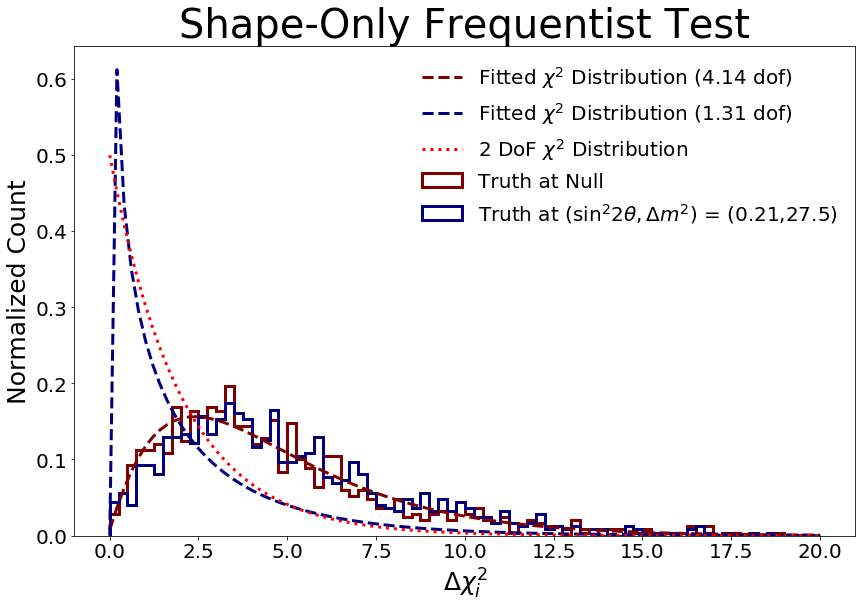

In [8]:
fig,ax = plt.subplots(figsize=(14,9))
_ = plt.hist(deltachisq_null_shapeonly,histtype='step',range=(0,20),bins=80,facecolor=None,linewidth=3,edgecolor='maroon',density=1,label='Truth at Null')
_ = plt.hist(deltachisq_bf_shapeonly,histtype='step',range=(0,20),bins=80,facecolor=None,linewidth=3,edgecolor='navy',density=1,label=r'Truth at ($\sin^22\theta,\Delta m^2$) = (0.21,27.5)')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


#ax.set_xlim(0,4)
# #ax.set_ylim(0,1)
x = np.linspace(.001,20,100)

ax.set_xlabel(r'$\Delta\chi^2_i$',fontsize=25)
ax.set_ylabel('Normalized Count',fontsize=25)


df,loc,scale = scipy.stats.distributions.chi2.fit(deltachisq_null_shapeonly)
fitted_data = scipy.stats.distributions.chi2.pdf(x,df,loc,scale)
plt.plot(x,fitted_data,'--',label=r'Fitted $\chi^2$ Distribution (%.2f dof)'%df,linewidth=3,color='maroon')
# print(scale)

df,loc,scale = scipy.stats.distributions.chi2.fit(deltachisq_bf_shapeonly)
fitted_data = scipy.stats.distributions.chi2.pdf(x,df,loc,scale)
plt.plot(x,fitted_data,'--',label=r'Fitted $\chi^2$ Distribution (%.2f dof)'%df,linewidth=3,color='navy')
# print(scale)


twodof_data = scipy.stats.distributions.chi2.pdf(x,2,0,1)
plt.plot(x,twodof_data,'r:',label=r'2 DoF $\chi^2$ Distribution',linewidth=3)

ax.legend(fontsize=20,frameon=False)

ax.set_title('Shape-Only Frequentist Test',fontsize=40)

In [9]:
dchi = deltachisq_bf_shapeonly

mindex_90 = int(np.floor((.9)*len(dchi)))
mindex_99 = int(np.floor((.99)*len(dchi)))
mindex_1sig = int(np.floor((.68)*len(dchi)))

print('90',np.partition(dchi,mindex_90)[mindex_90])
print('99',np.partition(dchi,mindex_99)[mindex_99])

90 9.862900000000003
99 18.729799999999997


Text(0.5, 1.0, 'Frequentist $\\Delta \\chi^2$ Distribution')

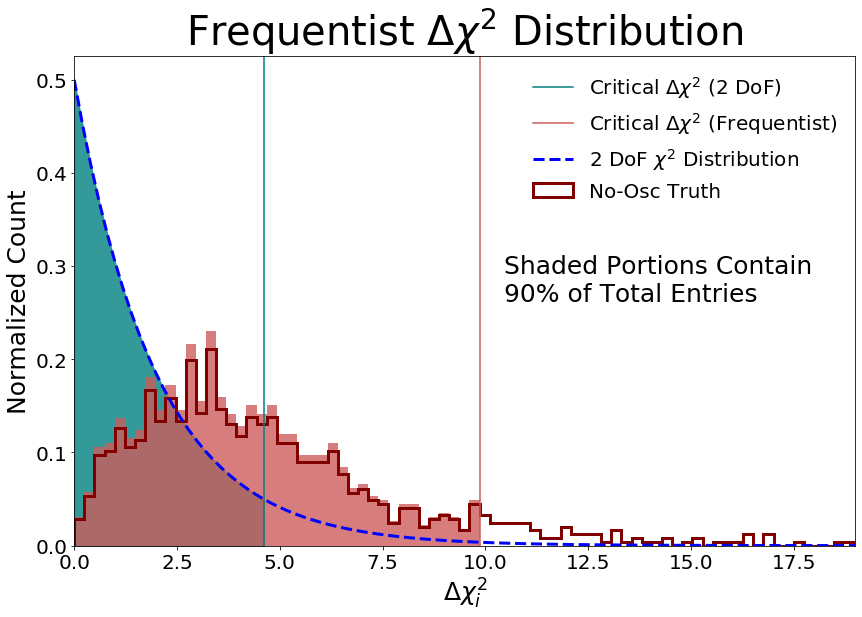

In [36]:
fig,ax = plt.subplots(figsize=(14,9))

ax.axvline(4.61,color='teal',label=r'Critical $\Delta \chi^2$ (2 DoF)')
ax.axvline(9.86,color='indianred',label=r'Critical $\Delta \chi^2$ (Frequentist)')


_ = plt.hist(deltachisq_null_shapeonly,histtype='step',range=(0,9.86*2),bins=80,facecolor=None,linewidth=3,edgecolor='maroon',density=1,label='No-Osc Truth')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


ax.set_xlim(0,19)
 #ax.set_ylim(0,1)
x = np.linspace(.001,9.86*2,100)

ax.set_xlabel(r'$\Delta\chi^2_i$',fontsize=25)
ax.set_ylabel('Normalized Count',fontsize=25)


twodof_data = scipy.stats.distributions.chi2.pdf(x,2,0,1)
xshort = np.linspace(0,4.61,100)
twodof_data_short = scipy.stats.distributions.chi2.pdf(xshort,2,0,1)

plt.plot(x,twodof_data,'--',color='blue',label=r'2 DoF $\chi^2$ Distribution',linewidth=3)



plt.fill_between(xshort,np.zeros(len(xshort)),twodof_data_short,color='teal',alpha=.8,zorder=-1)
_ = plt.hist(deltachisq_null_shapeonly,range=(0,9.86),bins=40,linewidth=3,facecolor='indianred',density=1,alpha=.8,zorder=-1)

plt.annotate('Shaded Portions Contain\n90% of Total Entries',xy=(0.55, .5), xycoords='axes fraction',fontsize= 25)
ax.legend(fontsize=20,frameon=False)


ax.set_title(r'Frequentist $\Delta \chi^2$ Distribution',fontsize=40)

# Shaperate

In [45]:
f_freqXcheck_null_shapeonly = np.genfromtxt('xcheck/freqxcheck_null_shaperate.txt')
chisqpt_null_shapeonly  = f_freqXcheck_null_shapeonly[:,1]
chisqbf_null_shapeonly = f_freqXcheck_null_shapeonly[:,2]
deltachisq_null_shapeonly = chisqpt_null_shapeonly-chisqbf_null_shapeonly

In [46]:
f_freqXcheck_bf_shapeonly = np.genfromtxt('xcheck/freqxcheck_bf_shaperate.txt')
chisqpt_bf_shapeonly  = f_freqXcheck_bf_shapeonly[:,1]
chisqbf_bf_shapeonly = f_freqXcheck_bf_shapeonly[:,2]
deltachisq_bf_shapeonly = chisqpt_bf_shapeonly-chisqbf_bf_shapeonly

In [48]:
f_freqXcheck_beppo_shapeonly = np.genfromtxt('xcheck/freqxcheck_beppo_shaperate.txt')
chisqpt_beppo_shapeonly  = f_freqXcheck_beppo_shapeonly[:,1]
chisqbf_beppo_shapeonly = f_freqXcheck_beppo_shapeonly[:,2]
deltachisq_beppo_shapeonly = chisqpt_beppo_shapeonly-chisqbf_beppo_shapeonly

Text(0.5, 1.0, 'Shape+Rate Frequentist Test')

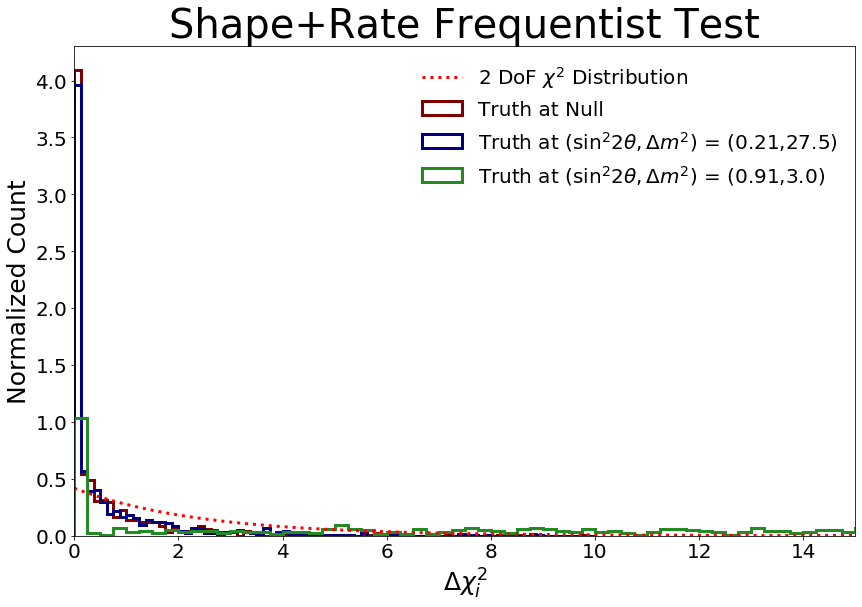

In [52]:
fig,ax = plt.subplots(figsize=(14,9))
_ = plt.hist(deltachisq_null_shapeonly,histtype='step',range=(0,10),bins=80,facecolor=None,linewidth=3,edgecolor='maroon',density=1,label='Truth at Null')
_ = plt.hist(deltachisq_bf_shapeonly,histtype='step',range=(0,10),bins=80,facecolor=None,linewidth=3,edgecolor='navy',density=1,label=r'Truth at ($\sin^22\theta,\Delta m^2$) = (0.21,27.5)')
_ = plt.hist(deltachisq_beppo_shapeonly,histtype='step',range=(0,20),bins=80,facecolor=None,linewidth=3,edgecolor='forestgreen',density=1,label=r'Truth at ($\sin^22\theta,\Delta m^2$) = (0.91,3.0)')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


ax.set_xlim(0,15)
# #ax.set_ylim(0,1)
x = np.linspace(.001,15,100)

ax.set_xlabel(r'$\Delta\chi^2_i$',fontsize=25)
ax.set_ylabel('Normalized Count',fontsize=25)


# df,loc,scale = scipy.stats.distributions.chi2.fit(deltachisq_null_shapeonly)
# fitted_data = scipy.stats.distributions.chi2.pdf(x,df,loc,scale)
# plt.plot(x,fitted_data,'--',label=r'Fitted $\chi^2$ Distribution (%.2f dof)'%df,linewidth=3,color='maroon')
# print(scale)

# df,loc,scale = scipy.stats.distributions.chi2.fit(deltachisq_bf_shapeonly)
# fitted_data = scipy.stats.distributions.chi2.pdf(x,df,loc,scale)
# plt.plot(x,fitted_data,'--',label=r'Fitted $\chi^2$ Distribution (%.2f dof)'%df,linewidth=3,color='navy')
# # print(scale)


twodof_data = scipy.stats.distributions.chi2.pdf(x,2,0,1.2)
plt.plot(x,twodof_data,'r:',label=r'2 DoF $\chi^2$ Distribution',linewidth=3)

ax.legend(fontsize=20,frameon=False)

ax.set_title('Shape+Rate Frequentist Test',fontsize=40)

In [56]:
dchi = deltachisq_null_shapeonly

mindex_90 = int(np.floor((.9)*len(dchi)))
mindex_99 = int(np.floor((.99)*len(dchi)))
mindex_1sig = int(np.floor((.68)*len(dchi)))

print('90',np.partition(dchi,mindex_90)[mindex_90])
print('99',np.partition(dchi,mindex_99)[mindex_99])

90 1.9353999999999978
99 7.130600000000001
